In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import gridspec

from IPython.display import Markdown

#from RegressionTools import plot_regression_eval, showModels, describeNetworkStructure

2025-03-03 17:24:09.951699: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-03 17:24:09.952397: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 17:24:09.954712: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 17:24:09.961401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741019049.972822    7444 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741019049.97

In [3]:
raw = pd.read_csv("Regression_BSD_hour.csv")

In [4]:
with open("Regression_BSD_Readme.txt", "r") as readme:
    display(Markdown(readme.read()))

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


In [24]:
raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [25]:
raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
X = pd.DataFrame.copy(raw)

X_days = X['dteday']
y = X['cnt']

all_days = len(X) // 24
print("Total observations", len(X))
print("Total number of days", all_days)
days_for_training = int(all_days * 0.7)
hours_for_training = days_for_training*24
X_train = X[0:hours_for_training]
X_test = X[hours_for_training:]

del X_train['dteday']
del X_test['dteday']
del X_train['cnt']
del X_test['cnt']

print("Observations for training", X_train.shape)
print("Observations for testing", X_test.shape)

Total observations 17379
Total number of days 724
Observations for training (12144, 15)
Observations for testing (5235, 15)


In [6]:
X_train.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

In [7]:
y_train = y[:hours_for_training]
y_test = y[hours_for_training:]

print("Observations and targets for training", X_train.shape, y_train.shape)
print("Observations and targets for testing", X_test.shape, y_test.shape)

Observations and targets for training (12144, 15) (12144,)
Observations and targets for testing (5235, 15) (5235,)


In [8]:
features = X_train.shape[1]
model = Sequential()
model.add(Input(shape=(features,)))
#model.add(Dense(20, activation='relu', name='Hidden'))
model.add(Dense(1, activation='linear', name='Output'))
model.compile(optimizer='adam', loss="mse")

model.summary()

print('Model Input shape:  ', model.input_shape)
print('Model Output shape: ', model.output_shape)



2025-03-03 17:24:30.569131: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

Model Input shape:   (None, 15)
Model Output shape:  (None, 1)


In [9]:
import keras

model = keras.Sequential([
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss="mse")


In [32]:
y_test

12144     10
12145     31
12146     54
12147    141
12148    289
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 5235, dtype: int64

In [10]:
results = model.fit(
    X_train, 
    y_train, 
    epochs=1000, 
    validation_data = (X_test, y_test),
    batch_size=1024,
    verbose=1)


Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7115251.5000 - val_loss: 29215834.0000
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6627355.5000 - val_loss: 27304112.0000
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6141606.5000 - val_loss: 25480216.0000
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5868062.0000 - val_loss: 23738414.0000
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5393478.0000 - val_loss: 22093966.0000
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4989499.0000 - val_loss: 20536224.0000
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4666100.5000 - val_loss: 19061246.0000
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4340074.0000 - val_loss: 17667602.0000
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3996436.2500 - val_loss: 16355443.0000
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3731282.2500 - val_loss: 15118440.0000
Epoch 11

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10891.4111 - val_loss: 27161.4590
Epoch 127/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10939.3027 - val_loss: 27023.9746
Epoch 128/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10945.3643 - val_loss: 26884.5137
Epoch 129/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10623.0352 - val_loss: 26743.8359
Epoch 130/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10928.6895 - val_loss: 26606.5703
Epoch 131/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10752.2949 - val_loss: 26463.0430
Epoch 132/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10467.5771 - val_loss: 26319.1777
Epoch 133/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10534.8457 - val_loss: 26183.4941
Epoch 134/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10321.4033 - val_loss: 26033.3203
Epoch 135/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10183.7217 - val_loss: 25881.2031
Epoch 136/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4014.8933 - val_loss: 10117.6982
Epoch 253/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3959.5820 - val_loss: 10005.0107
Epoch 254/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3860.1736 - val_loss: 9897.0967
Epoch 255/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3942.5078 - val_loss: 9795.4609
Epoch 256/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3877.3489 - val_loss: 9683.4316
Epoch 257/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3831.8931 - val_loss: 9577.1523
Epoch 258/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3777.6052 - val_loss: 9468.4580
Epoch 259/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3639.9985 - val_loss: 9357.9287
Epoch 260/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3634.6558 - val_loss: 9259.2549
Epoch 261/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3596.4104 - val_loss: 9153.1660
Epoch 262/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3699.9431 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1828.2164 - val_loss: 4582.4380
Epoch 317/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1826.5223 - val_loss: 4518.0400
Epoch 318/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1755.6409 - val_loss: 4457.9883
Epoch 319/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1753.3185 - val_loss: 4396.3818
Epoch 320/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1713.6138 - val_loss: 4334.0054
Epoch 321/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1654.8210 - val_loss: 4273.0874
Epoch 322/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1688.8701 - val_loss: 4214.3003
Epoch 323/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1704.2639 - val_loss: 4158.0752
Epoch 324/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1663.2069 - val_loss: 4099.0645
Epoch 325/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1595.6885 - val_loss: 4041.1296
Epoch 326/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1591.7915 -

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 347.6460 - val_loss: 767.7093
Epoch 445/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 326.0880 - val_loss: 760.8791
Epoch 446/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 325.0521 - val_loss: 751.4640
Epoch 447/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 319.5476 - val_loss: 741.4627
Epoch 448/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322.1865 - val_loss: 734.0532
Epoch 449/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 322.0820 - val_loss: 724.9402
Epoch 450/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 318.4393 - val_loss: 716.7994
Epoch 451/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 315.4415 - val_loss: 707.0497
Epoch 452/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 305.3894 - val_loss: 700.4986
Epoch 453/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 302.8373 - val_loss: 689.7398
Epoch 454/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 302.9601 - val_loss: 681.3190
Epo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.9960 - val_loss: 183.8114
Epoch 575/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.0329 - val_loss: 182.7310
Epoch 576/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 85.2709 - val_loss: 178.2762
Epoch 577/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.2480 - val_loss: 178.0215
Epoch 578/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.0950 - val_loss: 177.8688
Epoch 579/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.7727 - val_loss: 174.5609
Epoch 580/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.5759 - val_loss: 171.8267
Epoch 581/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.0506 - val_loss: 168.6742
Epoch 582/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.0574 - val_loss: 169.0193
Epoch 583/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.0319 - val_loss: 168.7686
Epoch 584/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79.6695 - val_loss: 164.8940
Epoch 585/1000

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.9164 - val_loss: 51.1675
Epoch 706/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27.0986 - val_loss: 51.9253
Epoch 707/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.5289 - val_loss: 51.4357
Epoch 708/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.0908 - val_loss: 49.4848
Epoch 709/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.8824 - val_loss: 49.2273
Epoch 710/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.9416 - val_loss: 49.5746
Epoch 711/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4082 - val_loss: 49.0384
Epoch 712/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.5224 - val_loss: 48.7266
Epoch 713/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.4137 - val_loss: 47.1486
Epoch 714/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24.7983 - val_loss: 46.4759
Epoch 715/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.6729 - val_loss: 47.7827
Epoch 716/1000
12/12 ━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.9320 - val_loss: 9.2040
Epoch 838/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8588 - val_loss: 9.4965
Epoch 839/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8874 - val_loss: 8.8292
Epoch 840/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8100 - val_loss: 8.9947
Epoch 841/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.7515 - val_loss: 8.3129
Epoch 842/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5872 - val_loss: 8.3764
Epoch 843/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5893 - val_loss: 8.3445
Epoch 844/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5341 - val_loss: 8.2492
Epoch 845/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4851 - val_loss: 8.1757
Epoch 846/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3669 - val_loss: 8.1794
Epoch 847/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2433 - val_loss: 8.3159
Epoch 848/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7923 - val_loss: 0.9534
Epoch 972/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7777 - val_loss: 0.7764
Epoch 973/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7570 - val_loss: 0.8450
Epoch 974/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7501 - val_loss: 0.9080
Epoch 975/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7255 - val_loss: 0.8482
Epoch 976/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7239 - val_loss: 0.7763
Epoch 977/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7021 - val_loss: 0.8198
Epoch 978/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6927 - val_loss: 0.8283
Epoch 979/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6839 - val_loss: 0.8097
Epoch 980/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6789 - val_loss: 0.8076
Epoch 981/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6613 - val_loss: 0.7499
Epoch 982/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5m

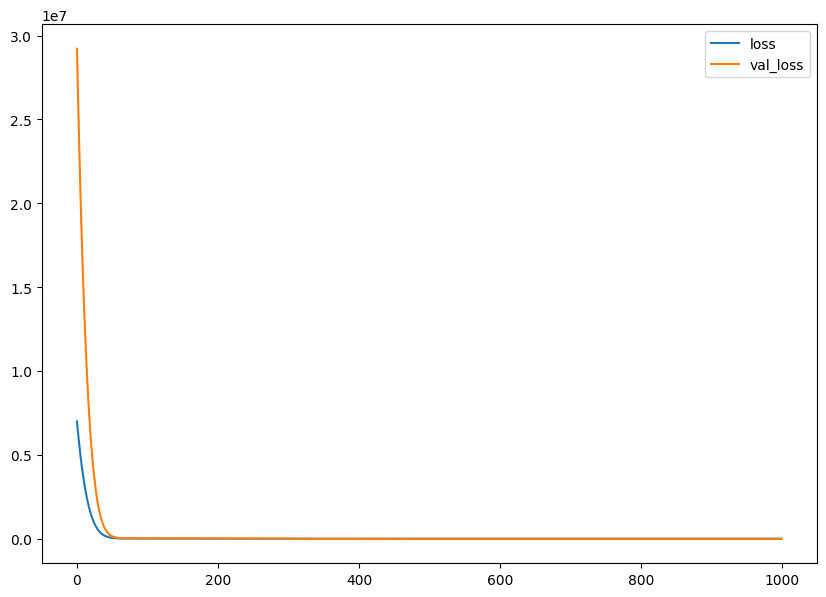

In [11]:
pd.DataFrame.from_dict(results.history).plot(figsize=(10,7))
plt.show()

In [12]:
X_eval = X_train
y_eval = y_train

y_pred = model.predict(X_eval).flatten()

prediction = pd.Series(y_pred, index=X_eval.index)


380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step


In [13]:
pd.DataFrame.from_dict({"y_eval":y_eval, "y_pred": y_pred}).head(10)

,y_eval,y_pred
0,16,15.391190
1,40,39.407867
2,32,31.447140
3,13,12.507121
4,1,0.553972
5,1,0.735479
6,2,1.647562
7,3,2.687154
8,8,7.705259
9,14,13.781250


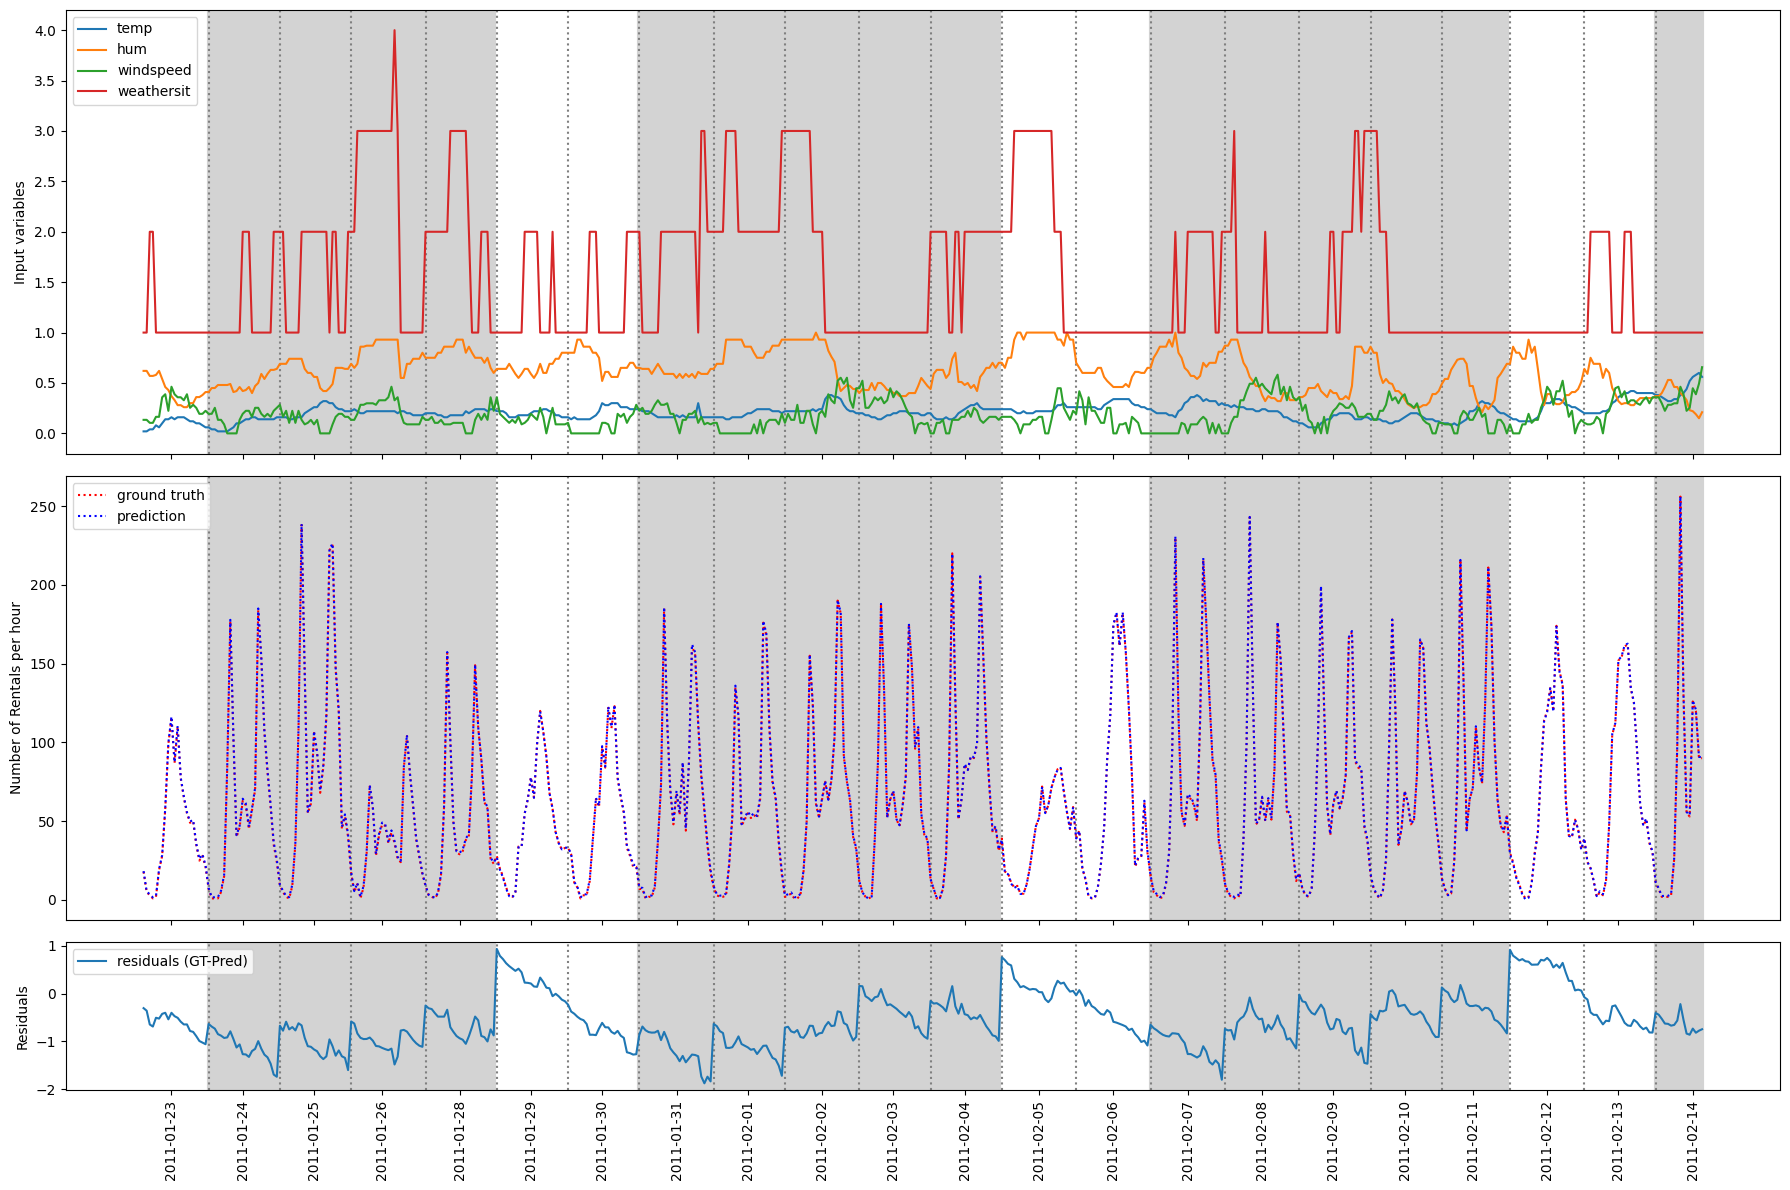

In [14]:
def plot_data(X, y, X_days, first_day = 3*7, duration_days = 3*7, prediction=None):
    s = first_day*24         # start hour
    e = s+duration_days*24   # end hour
    
    if prediction is None:
        fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(18,10), sharex=True)
        ax2 = None
    else:
        fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(18,12), sharex=True, gridspec_kw={'height_ratios': [3,3,1]})
    
    # fill the background of the working days
    for x,v in X['workingday'][s:e].items():
        if v==1: 
            ax0.axvline(x, lw=3, c='lightgrey')
            ax1.axvline(x, lw=3, c='lightgrey')
            if ax2: ax2.axvline(x, lw=3, c='lightgrey')

    mid_day_indexes = []
    # drawing lines between the days
    for x,v in X['hr'][s:e].items():
        if v==0: 
            ax0.axvline(x, ls=':', c='grey')
            ax1.axvline(x, ls=':', c='grey')
            if ax2: ax2.axvline(x, ls=':', c='grey')
        if v==12:  
            mid_day_indexes.append(x) 

    for c in [
        'temp', 'hum', 'windspeed', 'weathersit', 
        # 'atemp', 'season', 'workingday', 'instant', 'dteday', 'weekday', 
        # 'yr', 'mnth', 'hr', 'holiday', 'casual', 'registered',  'cnt'
    ]: ax0.plot(X[c][s:e], label=c)

    ax0.legend(loc="upper left")
    ax0.set_ylabel('Input variables')
    
    ax1.plot(y[s:e], 'r:', label="ground truth")
    
    if prediction is not None:
        ax1.plot(prediction[s:e], 'b:', label="prediction")

    ax1.legend(loc="upper left")
    ax1.set_ylabel('Number of Rentals per hour')
    
    
    if ax2:
        ax2.plot(y[s:e]-prediction[s:e], label="residuals (GT-Pred)")
        ax2.set_ylabel('Residuals')
        ax2.legend(loc="upper left")


        ax2.set_xticks(mid_day_indexes)
        ax2.xaxis.set_ticklabels([X_days[i] for i in mid_day_indexes], rotation=90)
    else:
        ax1.set_xticks(mid_day_indexes)
        ax1.xaxis.set_ticklabels([X_days[i] for i in mid_day_indexes], rotation=90)

        
    
    plt.tight_layout()
    # plt.savefig('plot.pdf')
    plt.show()
    
plot_data(X_train, y_train, X_days, prediction=prediction)


# What happened? 
Why is this simple network so good at this job?


